In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams

In [2]:
airline=pd.read_csv("EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
#Normalization
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
df=norm_func(airline.iloc[:,1:])
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [5]:
# dendrogram,linkage
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage



Text(0, 0.5, 'Distance')

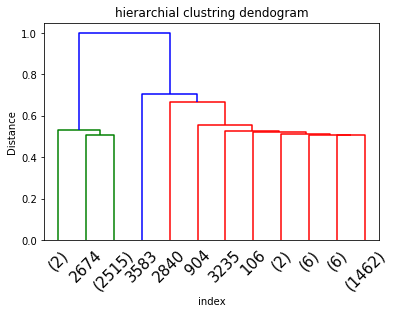

In [14]:
# dendrogram,linkage="single"
z=linkage(df,method="single",metric="euclidean")
dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15)
plt.title('hierarchial clustring dendogram')
plt.xlabel('index')
plt.ylabel('Distance')

Text(0, 0.5, 'Distance')

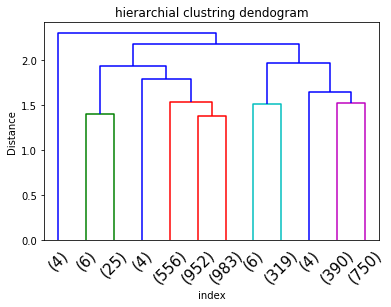

In [26]:
# dendrogram,linkage="compete"
z=linkage(df,method="complete",metric="euclidean")
dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15)
plt.title('hierarchial clustring dendogram')
plt.xlabel('index')
plt.ylabel('Distance')

Text(0, 0.5, 'Distance')

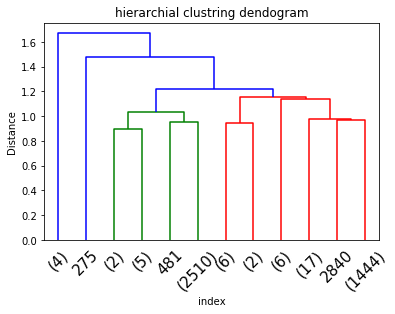

In [13]:
# dendrogram,linkage="average"
z=linkage(df,method="average",metric="euclidean")
dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15)
plt.title('hierarchial clustring dendogram')
plt.xlabel('index')
plt.ylabel('Distance')


In [11]:
# AgglomerativeClustering,linkage="single"
from sklearn.cluster import AgglomerativeClustering
Hcluster=AgglomerativeClustering(n_clusters=4,linkage='single',affinity='euclidean')
y_hc=Hcluster.fit_predict(df)
y_hc

array([1, 1, 1, ..., 0, 1, 1])

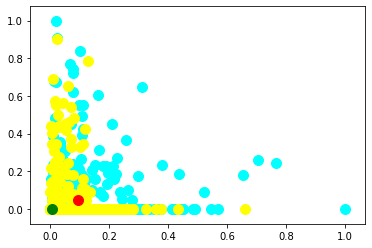

In [12]:
#scatterplot
X = np.array(df)
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='cyan')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='yellow')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='red')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='green')


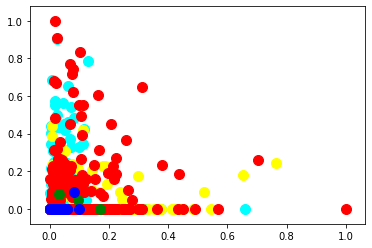

In [22]:
# AgglomerativeClustering,linkage="compete"
from sklearn.cluster import AgglomerativeClustering
Hcluster=AgglomerativeClustering(n_clusters=5,linkage='complete',affinity='euclidean')
y_hc=Hcluster.fit_predict(df)
X = np.array(df)
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='cyan')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='yellow')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='red')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='green')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='blue')

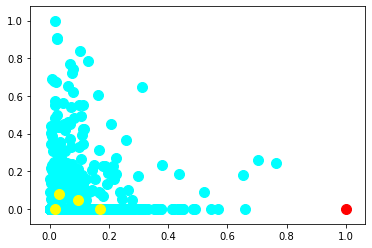

In [23]:
# AgglomerativeClustering,linkage="average"
from sklearn.cluster import AgglomerativeClustering
Hcluster=AgglomerativeClustering(n_clusters=3,linkage='average',affinity='euclidean')
y_hc=Hcluster.fit_predict(df)
X = np.array(df)
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='cyan')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='yellow')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='red')
